In [3]:
import pickle
import numpy as np
from sklearn.linear_model import MultiTaskLasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load data
dat = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/session_responses.p', 'rb'))
dino = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226/dinov2_features.p', 'rb'))
dino_mid = pickle.load(open('/home/maria/Documents/HarvardData/processed_sessions_v3/Bo220226_middle_layers/dinov2_features.p', 'rb'))

# Convert data to numpy arrays if they aren't already
X = np.array(dino)
y = np.array(dat)

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()

# Initialize MultiTaskLasso regression
mt_lasso = MultiTaskLasso(alpha=1, random_state=42)

# Initialize RFE with MultiTaskLasso as the estimator
# You can specify the number of features to select; for example, select 100 features
n_features_to_select = 10  # Adjust based on your data and computational resources
rfe = RFE(estimator=mt_lasso, n_features_to_select=n_features_to_select, step=0.1, verbose=1)

# Create a pipeline with scaling, RFE, and MultiTaskLasso
pipeline = Pipeline([
    ('scaler', scaler),
    ('rfe', rfe),
    ('mt_lasso', mt_lasso)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the training set
y_pred_train = pipeline.predict(X_train)

# Predict on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate variance explained (R^2 score) on the test set
variance_explained_test = r2_score(y_test, y_pred_test, multioutput='raw_values')

# Calculate variance explained on the training set
variance_explained_train = r2_score(y_train, y_pred_train, multioutput='raw_values')

# Print the results
print(f"Variance explained (R²) on the test set: {variance_explained_test}")
print(f"Variance explained (R²) on the training set: {variance_explained_train}")


Fitting estimator with 768 features.
Fitting estimator with 692 features.
Fitting estimator with 616 features.
Fitting estimator with 540 features.
Fitting estimator with 464 features.
Fitting estimator with 388 features.
Fitting estimator with 312 features.
Fitting estimator with 236 features.
Fitting estimator with 160 features.
Fitting estimator with 84 features.
Variance explained (R²) on the test set: [ 0.12736911  0.07827791  0.02646622  0.09166109  0.09944328  0.24201261
  0.18789632  0.09318166  0.0433004   0.01504383  0.15945828  0.02246418
  0.0366711   0.0537841   0.07628722  0.13108825  0.10527699  0.07251642
  0.0632916   0.08265126  0.01717856  0.03486667  0.14927524 -0.01585257
  0.15325568  0.03466872  0.15363566  0.10971985  0.20724972  0.11174349
  0.11519227  0.0461882   0.04399178  0.07299219  0.12425318  0.1632861
  0.06879889  0.16727118 -0.02675951  0.16384972  0.02799183  0.13807605
  0.1145481   0.17072728  0.0349036   0.24035248  0.0797565   0.07119003
  0.239

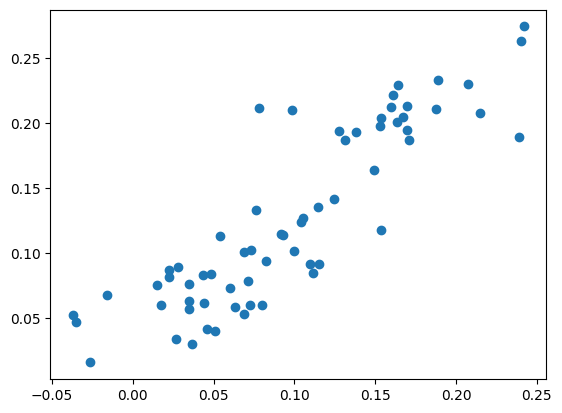

In [7]:
variance_explained_train
import matplotlib.pyplot as plt
plt.scatter(variance_explained_test, variance_explained_train)